# Introduction
## For this project, we will be looking at total honey production in the United States per year.


### Importing Our Data

The first step we will be taking is importing the different libraries we will need throughout this project. After that, we can read in our dataset and use .head to look over our different columns.

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv(r'C:\Users\amyar\Downloads\us_honey_dataset_updated.csv')

In [6]:
print(df.head())

   Unnamed: 0       state  colonies_number  yield_per_colony  production  \
0           0     Alabama            16000                58      928000   
1           1     Arizona            52000                79     4108000   
2           2    Arkansas            50000                60     3000000   
3           3  California           420000                93    39060000   
4           4    Colorado            45000                60     2700000   

    stocks  average_price  value_of_production  year  
0    28000           62.0               575000  1995  
1   986000           68.0              2793000  1995  
2   900000           64.0              1920000  1995  
3  4687000           60.0             23436000  1995  
4  1404000           68.0              1836000  1995  


Let's focus on the total production of honey per year. In order to do this, we will use .groupby() and create a scatterplot to see how the production has changed over the years.

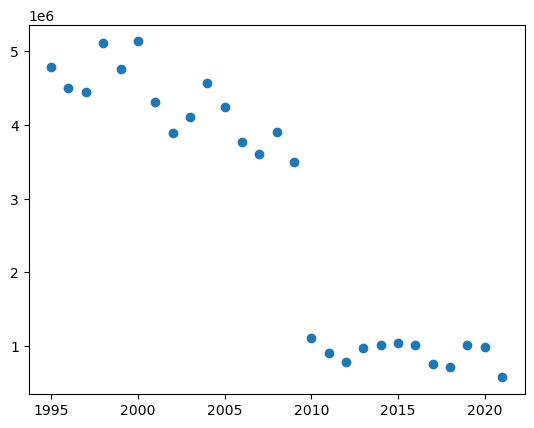

In [8]:
production_by_year = df.groupby('year').production.mean().reset_index()

X = production_by_year['year']
X = X.values.reshape(-1, 1)

y = production_by_year['production']

plt.scatter(X, y)
plt.show()

We can create a linear regression model and find the intercept and coefficient of our data. We can use this information to predict the future years of honey production at the current rate.

In [9]:
regression = linear_model.LinearRegression()
regression.fit(X, y)

print(regression.coef_[0])
print(regression.intercept_)

-203401.47041493256
411227236.78717226


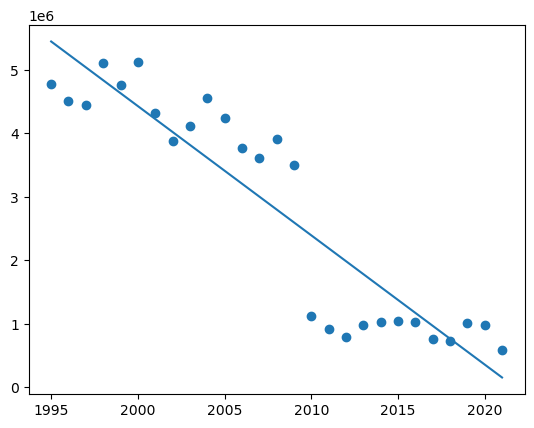

In [10]:
y_predict = regression.predict(X)

plt.scatter(X, y)
plt.plot(X, y_predict)
plt.show()

We have a negative coefficient that results in a negative slope. This indicates that honey production is decreasing over the years. We can use this information to determine approximately what year honey production would cease without a change in the current climate.

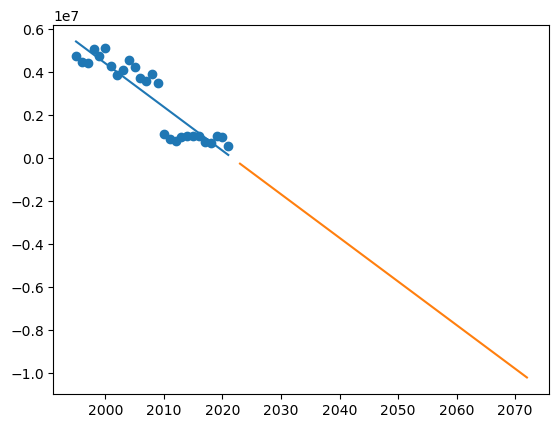

In [11]:
X_future = np.array(range(2023, 2073))
X_future = X_future.reshape(-1, 1)

future_predict = regression.predict(X_future)

plt.scatter(X, y)
plt.plot(X, y_predict)
plt.plot(X_future, future_predict)
plt.show()

From the above chart, we can see that honey production in the United States had a strong probability of ceasing near the year 2020.